<a href="https://colab.research.google.com/github/EmePin/Inteligencia_Artificial/blob/main/Algoritmo_A__19161382_Aim%C3%A9eJahda%C3%ADPinedaNiv%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMO A***

A* es un algoritmo de búsqueda inteligente o informada que busca el camino más corto desde un estado inicial al estado meta a través de un espacio de problema, usando una heurística óptima (distancia euclidiana o distancia Manhantan). Como ignora los pasos más cortos (más "chatos") en algunos casos rinde una solución subóptima.



### EJEMPLO RESUELTO CON HEURÍSTICA DE DISTANCIA MANHATAN
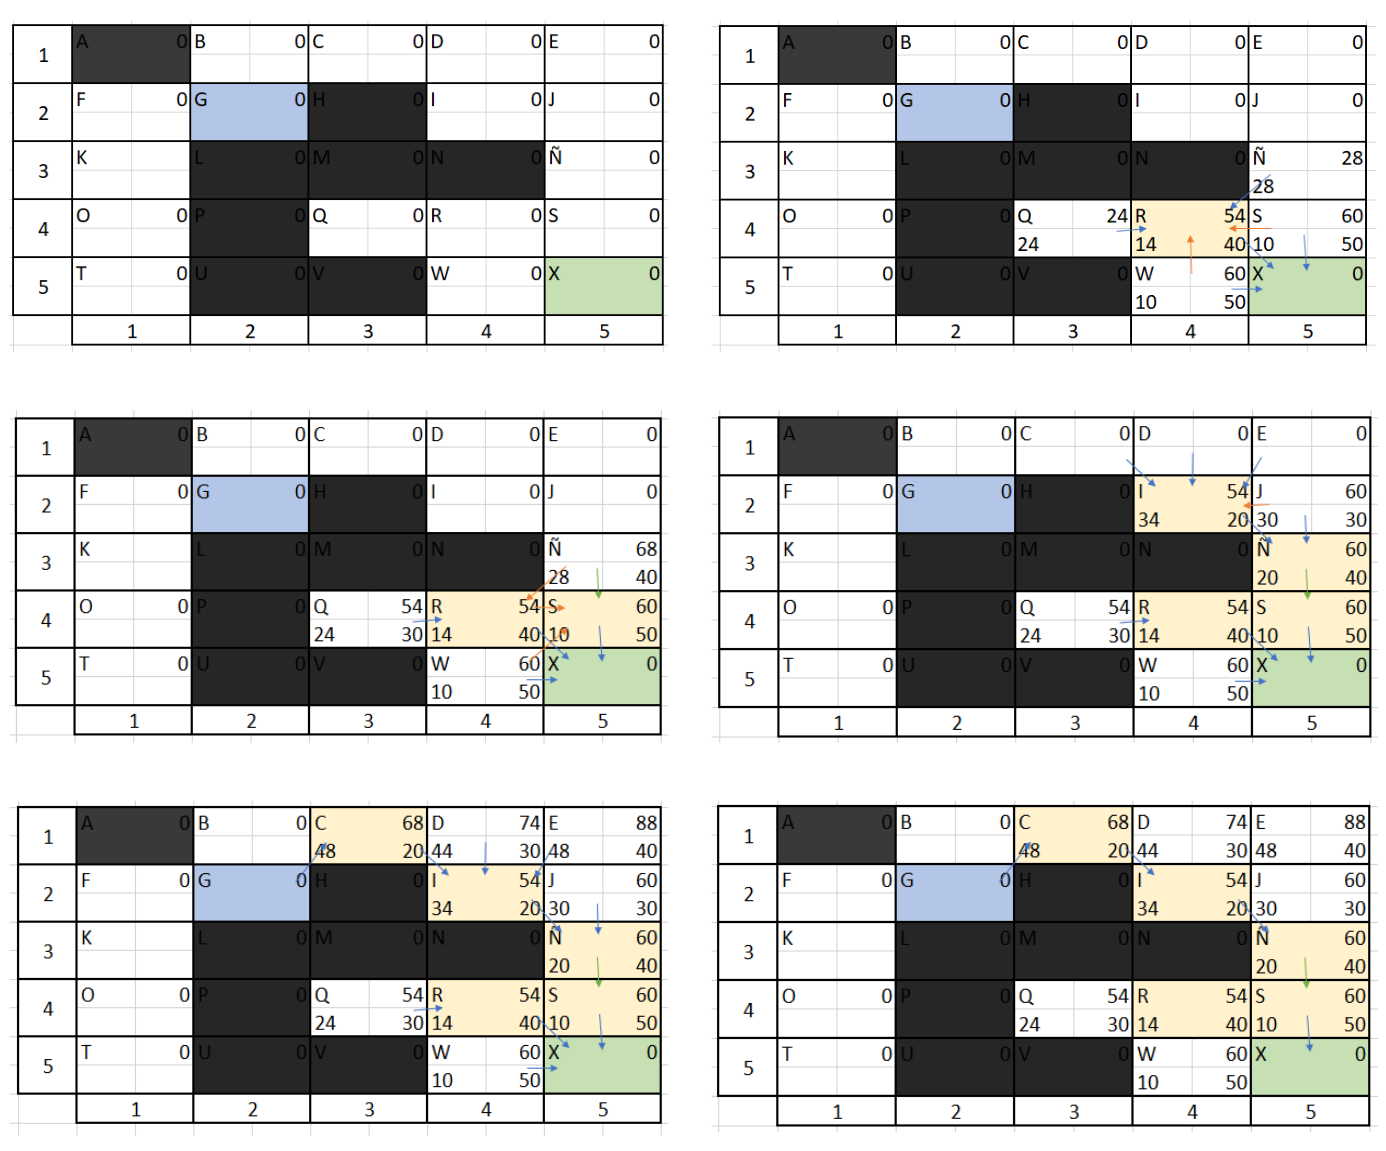

### EJEMPLO RESUELTO CON HEURÍSTICA DE DISTANCIA EUCLIDIANA
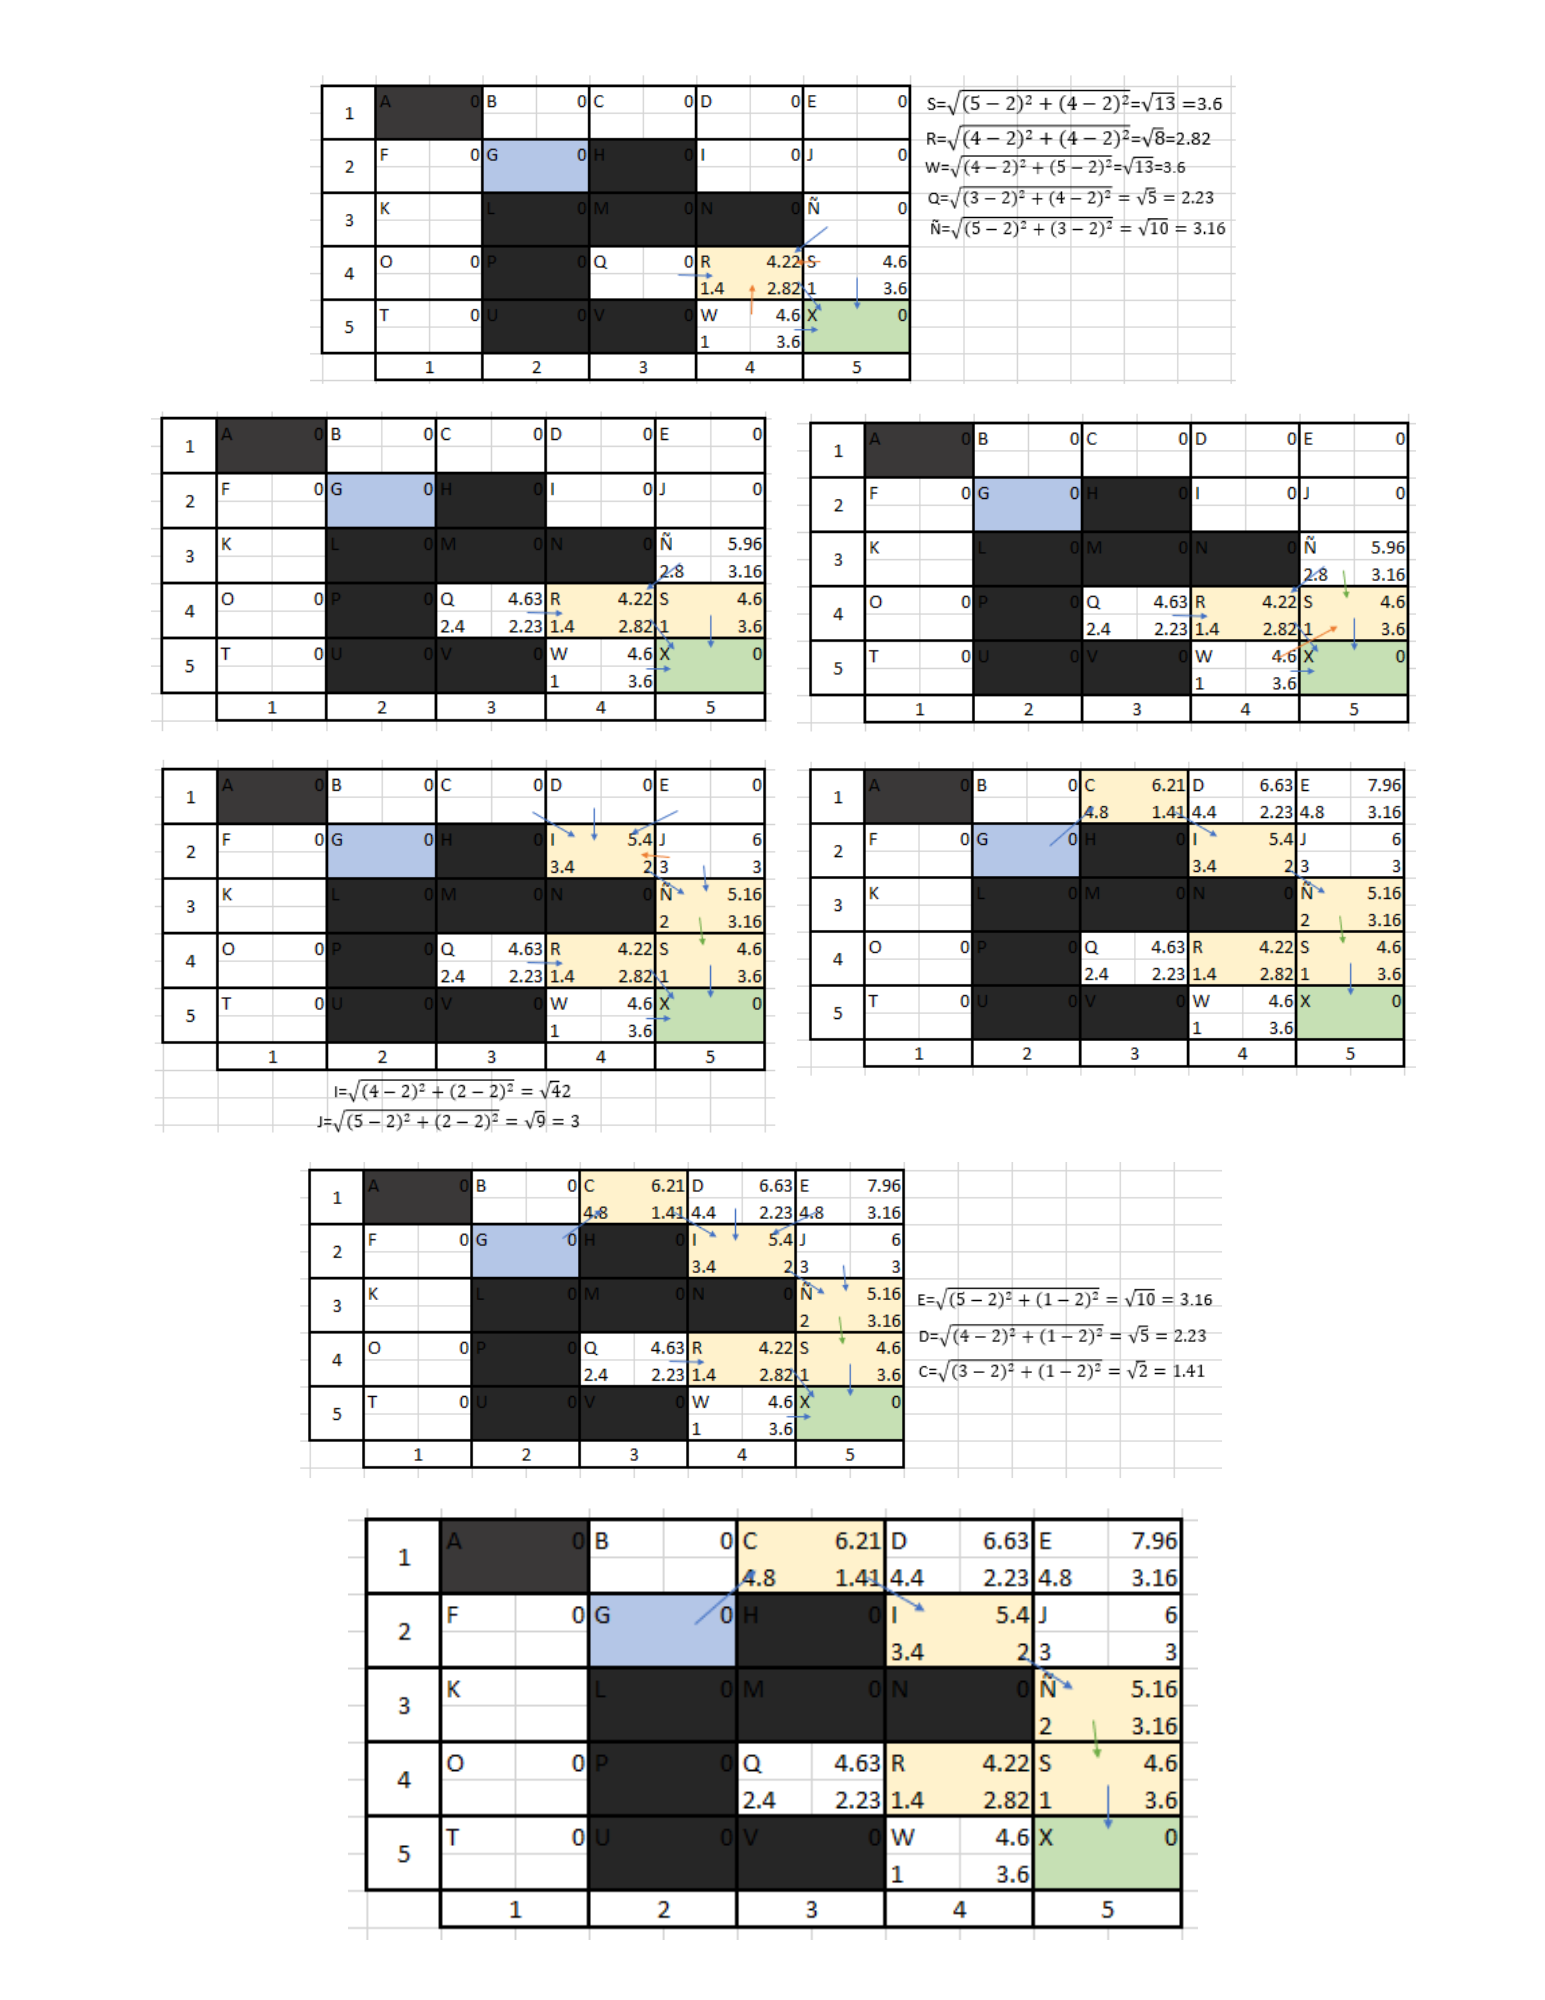

Éste es el código y las coordenadas están en el formato del pdf de 1-n

In [5]:
import heapq #mantiene la lista OPEN como una cola de prioridad (valor f). La función heapq.heappush agrega elementos a la cola. heapq.heappop obtiene el elemento con la prioridad más baja.
import math


'''
la clase Solution se utiliza para representar el resultado del algoritmo A*, y el método __str__ permite imprimir el resultado en un formato fácil de leer.
'''
class Solution:
    def __init__(self, path):
        self.path = path

    def __str__(self):
        return " -> ".join([f"({y+1},{x+1})" for x, y in self.path])# Aquí le añadí +1 para que vaya de 1-n

# Función para calcular la heurística h_score: la distancia Euclidiana entre dos puntos
def distancia_euclidiana(punto1, punto2):
    x1, y1 = punto1
    x2, y2 = punto2
    return math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))

# Función para encontrar el camino más corto utilizando A*
def encontrar_camino_mas_corto(tablero, node_start, node_goal):

    list_OPEN = []  #Initialize OPEN list
    list_CLOSED = set()  #Initialize OPEN list
    # Add node_start to the OPEN list:
    heapq.heappush(list_OPEN, (0, node_start)) # El nodo de inicio se agrega a la lista OPEN con una tupla que incluye el valor f y el nodo.

    parent = {} # a medida que se exploran los nodos sucesores y se elige un nodo como siguiente paso en el camino, se actualiza este diccionario para registrar cuál es el nodo padre de cada nodo en el camino.
    g = {node_start: 0} #Se crea otro diccionario llamado g, que se utiliza para llevar un registro de los costos acumulados (g) para llegar a cada nodo desde el nodo inicial (node_start).

    direcciones = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)] #para ir arriba, abajo, derecha, izquierda, diagonal arriba derecha, diagonal arriba izquierda, diagonal abajo derecha y diagonal abajo izquierda.

    #Se utiliza un bucle while que continúa mientras la lista OPEN no esté vacía.
    while list_OPEN:
        #Get node n off the OPEN list with the lowest f(n)
        _, node = heapq.heappop(list_OPEN)#Get node n off the OPEN list with the lowest f(n)
        n = node

        #if n is the same as node_goal we have found the solution; return Solution(n)
        if node == node_goal:
            camino = []
            #Este bucle se ejecuta mientras el nodo actual (node) esté presente en el diccionario parent.
            while node in parent:
                camino.append(node) # El nodo actual (node) se agrega a la lista camino. Esto construye el camino desde el nodo objetivo hacia el nodo inicial en orden inverso.
                node = parent[node] # Se actualiza node con el nodo padre del nodo actual. Esto permite retroceder en el camino hacia el nodo inicial.
            camino.append(node_start) # Después de que el bucle haya terminado, se agrega el nodo inicial (node_start) al final
            camino.reverse()#se invierten los nodos del caminito
            return Solution(camino) # Se crea un objeto de la clase Solution con el camino encontrado

        list_CLOSED.add(node) # Add n to the CLOSED list:

        #Generate each successor node n' of n
        for dx, dy in direcciones: #for each successor node n' of n
            x, y = n # representan las coordenadas x e y del nodo actual n.
            '''
            dx y dy son las componentes de dirección que se toman de la lista de direcciones (por ejemplo, (0, 1) para moverse hacia arriba).
            '''
            nueva_x, nueva_y = x + dx, y + dy # Esto representa la nueva posición en la cuadrícula después de moverse en la dirección especificada por (dx, dy).
            vecino = (nueva_x, nueva_y) # es una tupla que contiene las coordenadas (nueva_x, nueva_y), lo que representa la posición del nodo sucesor en la dirección especificada.

            if 0 <= nueva_x < len(tablero) and 0 <= nueva_y < len(tablero[0]) and tablero[nueva_x][nueva_y] != 1: #verifica si la nueva posición se encuentra dentro de los límites del tablero y si el valor en esa posición del tablero no es igual a 1
                g_probable = g[n] + (1 if dx == 0 or dy == 0 else math.sqrt(2)) #Set g(n') to be g(n) plus the cost to get to n' from n
                #El costo es 1 si el movimiento es horizontal o vertical (arriba, abajo, izquierda o derecha), y es la raíz cuadrada de 2 si el movimiento es diagonal.

                """
                Aquí se verifica si el nodo sucesor vecino no está en la lista OPEN o si el nuevo costo g_probable es menor que el costo existente g[vecino]. Si ambas condiciones se cumplen, se actualiza el padre, el costo g, se recalcula h, se recalcula f, y se agrega el nodo vecino a la lista OPEN con el nuevo valor f. Si estas condiciones no se cumplen, se descarta el nodo vecino y se continúa con el siguiente sucesor.
                """
                if vecino not in g or g_probable < g[vecino]:
                    parent[vecino] = n #Set the parent of n' to n
                    g[vecino] = g_probable #actualiza el valor de g para el nodo vecino con el costo acumulado g_probable

                    h = distancia_euclidiana(vecino, node_goal) #Set h(n') to be the heuristically estimate distance to node_goal
                    f = g_probable + h #Set f(n') to be g(n') plus h(n')

                    """
                    En esta parte del código, se verifica si el nodo sucesor vecino (n') no está en la lista CLOSED. Si no está en la lista CLOSED, se agrega el nodo sucesor n' a la lista OPEN con el nuevo valor f, que representa el costo total estimado. Esto cumple con la función de "Agregar n' a la lista OPEN" según lo especificado en el pseudocódigo.
                    """
                    if vecino not in list_CLOSED:
                        heapq.heappush(list_OPEN, (f, vecino))

    return "No se encontró una solución"


# Tablero de juego
tablero = [
    [1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1]
]

# Ingresar las coordenadas en formato de plano cartesiano (1 a n)
start_cartesiano = (5, 5)  # Coordenadas de inicio
goal_cartesiano = (2, 2)   # Coordenadas de meta


# Convertir las coordenadas a formato de matriz (0-4)
node_start = (start_cartesiano[1] - 1, start_cartesiano[0] - 1) #Create start node; call it node_start:
node_goal = (goal_cartesiano[1] - 1, goal_cartesiano[0] - 1) #Crea el nodo objetivo; llámalo node_goal.

# Encontrar el camino más corto
solucion = encontrar_camino_mas_corto(tablero, node_start, node_goal)

# Imprimir el camino más corto en formato de coordenadas del plano cartesiano
print("\nCamino más corto:")
print(solucion)

# Imprimir el tablero inicial con números de fila y columna
print("\nTablero Inicial:")
print("   ", end="")
for j in range(len(tablero[0])):
    print(j + 1, end="   ") # sumé 1 para que imprimiera del 1-n
print()
for i in range(len(tablero)):
    print(i + 1, end="  ") # sumé 1 para que imprimiera del 1-n
    for j in range(len(tablero[0])):
        if (i, j) == node_start:
            print("S ", end="  ")
        elif (i, j) == node_goal:
            print("G ", end="  ")
        else:
            print(str(tablero[i][j]) + " ", end="  ")
    print()

# Imprimir el tablero con números de fila y columna y el camino más corto
print("\nTablero con Camino más Corto:")
print("   ", end="")
for j in range(len(tablero[0])):
    print(j + 1, end="   ") # sumé 1 para que imprimiera del 1-n
print()
for i in range(len(tablero)):
    print(i + 1, end="  ") # sumé 1 para que imprimiera del 1-n
    for j in range(len(tablero[0])):
        if (i, j) == node_start:
            print("S ", end="  ")
        elif (i, j) == node_goal:
            print("G ", end="  ")
        elif (i, j) in solucion.path:
            print("* ", end="  ")
        else:
            print(str(tablero[i][j]) + " ", end="  ")
    print()







Camino más corto:
(5,5) -> (5,4) -> (5,3) -> (4,2) -> (3,1) -> (2,2)

Tablero Inicial:
   1   2   3   4   5   
1  1   0   0   0   0   
2  0   G   1   0   0   
3  0   1   1   1   0   
4  0   1   0   0   0   
5  0   1   1   0   S   

Tablero con Camino más Corto:
   1   2   3   4   5   
1  1   0   *   0   0   
2  0   G   1   *   0   
3  0   1   1   1   *   
4  0   1   0   0   *   
5  0   1   1   0   S   


Sí funciona para otros tableros n*n



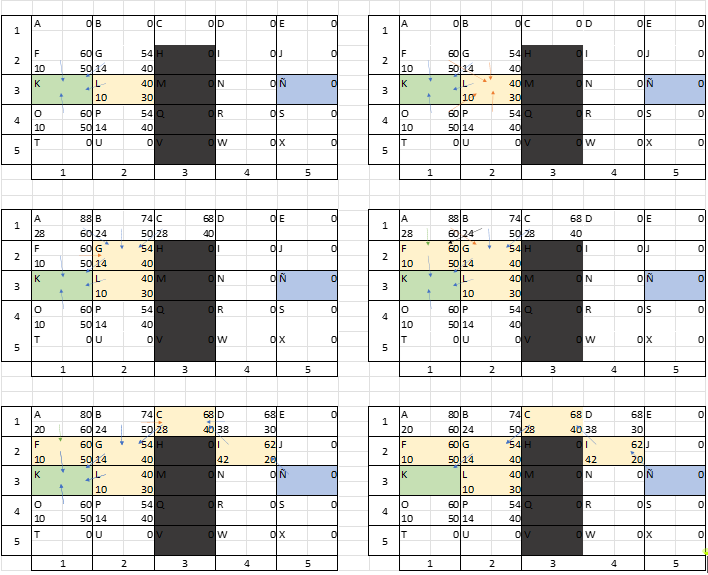

In [6]:
import heapq #mantiene la lista OPEN como una cola de prioridad (valor f). La función heapq.heappush agrega elementos a la cola. heapq.heappop obtiene el elemento con la prioridad más baja.
import math


'''
la clase Solution se utiliza para representar el resultado del algoritmo A*, y el método __str__ permite imprimir el resultado en un formato fácil de leer.
'''
class Solution:
    def __init__(self, path):
        self.path = path

    def __str__(self):
        return " -> ".join([f"({y+1},{x+1})" for x, y in self.path])# Aquí le añadí +1 para que vaya de 1-n

# Función para calcular la heurística h_score: la distancia Euclidiana entre dos puntos
def distancia_euclidiana(punto1, punto2):
    x1, y1 = punto1
    x2, y2 = punto2
    return math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))

# Función para encontrar el camino más corto utilizando A*
def encontrar_camino_mas_corto(tablero, node_start, node_goal):

    list_OPEN = []  #Initialize OPEN list
    list_CLOSED = set()  #Initialize OPEN list
    # Add node_start to the OPEN list:
    heapq.heappush(list_OPEN, (0, node_start)) # El nodo de inicio se agrega a la lista OPEN con una tupla que incluye el valor f y el nodo.

    parent = {} # a medida que se exploran los nodos sucesores y se elige un nodo como siguiente paso en el camino, se actualiza este diccionario para registrar cuál es el nodo padre de cada nodo en el camino.
    g = {node_start: 0} #Se crea otro diccionario llamado g, que se utiliza para llevar un registro de los costos acumulados (g) para llegar a cada nodo desde el nodo inicial (node_start).

    direcciones = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)] #para ir arriba, abajo, derecha, izquierda, diagonal arriba derecha, diagonal arriba izquierda, diagonal abajo derecha y diagonal abajo izquierda.

    #Se utiliza un bucle while que continúa mientras la lista OPEN no esté vacía.
    while list_OPEN:
        #Get node n off the OPEN list with the lowest f(n)
        _, node = heapq.heappop(list_OPEN)#Get node n off the OPEN list with the lowest f(n)
        n = node

        #if n is the same as node_goal we have found the solution; return Solution(n)
        if node == node_goal:
            camino = []
            #Este bucle se ejecuta mientras el nodo actual (node) esté presente en el diccionario parent.
            while node in parent:
                camino.append(node) # El nodo actual (node) se agrega a la lista camino. Esto construye el camino desde el nodo objetivo hacia el nodo inicial en orden inverso.
                node = parent[node] # Se actualiza node con el nodo padre del nodo actual. Esto permite retroceder en el camino hacia el nodo inicial.
            camino.append(node_start) # Después de que el bucle haya terminado, se agrega el nodo inicial (node_start) al final
            camino.reverse()#se invierten los nodos del caminito
            return Solution(camino) # Se crea un objeto de la clase Solution con el camino encontrado

        list_CLOSED.add(node) # Add n to the CLOSED list:

        #Generate each successor node n' of n
        for dx, dy in direcciones: #for each successor node n' of n
            x, y = n # representan las coordenadas x e y del nodo actual n.
            '''
            dx y dy son las componentes de dirección que se toman de la lista de direcciones (por ejemplo, (0, 1) para moverse hacia arriba).
            '''
            nueva_x, nueva_y = x + dx, y + dy # Esto representa la nueva posición en la cuadrícula después de moverse en la dirección especificada por (dx, dy).
            vecino = (nueva_x, nueva_y) # es una tupla que contiene las coordenadas (nueva_x, nueva_y), lo que representa la posición del nodo sucesor en la dirección especificada.

            if 0 <= nueva_x < len(tablero) and 0 <= nueva_y < len(tablero[0]) and tablero[nueva_x][nueva_y] != 1: #verifica si la nueva posición se encuentra dentro de los límites del tablero y si el valor en esa posición del tablero no es igual a 1
                g_probable = g[n] + (1 if dx == 0 or dy == 0 else math.sqrt(2)) #Set g(n') to be g(n) plus the cost to get to n' from n
                #El costo es 1 si el movimiento es horizontal o vertical (arriba, abajo, izquierda o derecha), y es la raíz cuadrada de 2 si el movimiento es diagonal.

                """
                Aquí se verifica si el nodo sucesor vecino no está en la lista OPEN o si el nuevo costo g_probable es menor que el costo existente g[vecino]. Si ambas condiciones se cumplen, se actualiza el padre, el costo g, se recalcula h, se recalcula f, y se agrega el nodo vecino a la lista OPEN con el nuevo valor f. Si estas condiciones no se cumplen, se descarta el nodo vecino y se continúa con el siguiente sucesor.
                """
                if vecino not in g or g_probable < g[vecino]:
                    parent[vecino] = n #Set the parent of n' to n
                    g[vecino] = g_probable #actualiza el valor de g para el nodo vecino con el costo acumulado g_probable

                    h = distancia_euclidiana(vecino, node_goal) #Set h(n') to be the heuristically estimate distance to node_goal
                    f = g_probable + h #Set f(n') to be g(n') plus h(n')

                    """
                    En esta parte del código, se verifica si el nodo sucesor vecino (n') no está en la lista CLOSED. Si no está en la lista CLOSED, se agrega el nodo sucesor n' a la lista OPEN con el nuevo valor f, que representa el costo total estimado. Esto cumple con la función de "Agregar n' a la lista OPEN" según lo especificado en el pseudocódigo.
                    """
                    if vecino not in list_CLOSED:
                        heapq.heappush(list_OPEN, (f, vecino))

    return "No se encontró una solución"


tablero = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]


start_cartesiano = (1, 3)
goal_cartesiano = (5, 3)


# Convertir las coordenadas a formato de matriz (0-4)
node_start = (start_cartesiano[1] - 1, start_cartesiano[0] - 1) #Create start node; call it node_start:
node_goal = (goal_cartesiano[1] - 1, goal_cartesiano[0] - 1) #Crea el nodo objetivo; llámalo node_goal.

# Encontrar el camino más corto
solucion = encontrar_camino_mas_corto(tablero, node_start, node_goal)

# Imprimir el camino más corto en formato de coordenadas del plano cartesiano
print("\nCamino más corto:")
print(solucion)

# Imprimir el tablero inicial con números de fila y columna
print("\nTablero Inicial:")
print("   ", end="")
for j in range(len(tablero[0])):
    print(j + 1, end="   ") # sumé 1 para que imprimiera del 1-n
print()
for i in range(len(tablero)):
    print(i + 1, end="  ") # sumé 1 para que imprimiera del 1-n
    for j in range(len(tablero[0])):
        if (i, j) == node_start:
            print("S ", end="  ")
        elif (i, j) == node_goal:
            print("G ", end="  ")
        else:
            print(str(tablero[i][j]) + " ", end="  ")
    print()

# Imprimir el tablero con números de fila y columna y el camino más corto
print("\nTablero con Camino más Corto:")
print("   ", end="")
for j in range(len(tablero[0])):
    print(j + 1, end="   ") # sumé 1 para que imprimiera del 1-n
print()
for i in range(len(tablero)):
    print(i + 1, end="  ") # sumé 1 para que imprimiera del 1-n
    for j in range(len(tablero[0])):
        if (i, j) == node_start:
            print("S ", end="  ")
        elif (i, j) == node_goal:
            print("G ", end="  ")
        elif (i, j) in solucion.path:
            print("* ", end="  ")
        else:
            print(str(tablero[i][j]) + " ", end="  ")
    print()







Camino más corto:
(1,3) -> (2,2) -> (3,1) -> (4,2) -> (5,3)

Tablero Inicial:
   1   2   3   4   5   6   
1  0   0   0   0   0   0   
2  0   0   1   0   0   0   
3  S   0   1   0   G   0   
4  0   0   1   0   0   0   
5  0   0   1   0   0   0   
6  0   0   1   0   0   0   

Tablero con Camino más Corto:
   1   2   3   4   5   6   
1  0   0   *   0   0   0   
2  0   *   1   *   0   0   
3  S   0   1   0   G   0   
4  0   0   1   0   0   0   
5  0   0   1   0   0   0   
6  0   0   1   0   0   0   
